In [7]:
##project2
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='./dataset', name='Cora', transform=NormalizeFeatures()) ##transform预处理
data = dataset[0]
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:,0], z[:,1], c=color, cmap='Set2')
    plt.show()

In [13]:
from torch.nn import Linear
import torch
import torch.nn.functional as F

##全连接层 ---不是GCN
class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training = self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels = 16)

criterion = torch.nn.CrossEntropyLoss()  #交叉熵
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

def test():
    model.eval()
    out = model(data.x)
    pred = out.argmax(dim = 1)
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    test.acc = (int)(test_correct.sum())/int(data.test_mask.sum())
    return test.acc

for epoch in range(1,201):
    loss = train()
    if epoch % 10 == 0:
        print(loss)


tensor(1.8893, grad_fn=<NllLossBackward0>)
tensor(1.7441, grad_fn=<NllLossBackward0>)
tensor(1.5020, grad_fn=<NllLossBackward0>)
tensor(1.2543, grad_fn=<NllLossBackward0>)
tensor(1.0563, grad_fn=<NllLossBackward0>)
tensor(0.8578, grad_fn=<NllLossBackward0>)
tensor(0.6864, grad_fn=<NllLossBackward0>)
tensor(0.6368, grad_fn=<NllLossBackward0>)
tensor(0.5520, grad_fn=<NllLossBackward0>)
tensor(0.5350, grad_fn=<NllLossBackward0>)
tensor(0.4908, grad_fn=<NllLossBackward0>)
tensor(0.4745, grad_fn=<NllLossBackward0>)
tensor(0.4603, grad_fn=<NllLossBackward0>)
tensor(0.4031, grad_fn=<NllLossBackward0>)
tensor(0.4212, grad_fn=<NllLossBackward0>)
tensor(0.3782, grad_fn=<NllLossBackward0>)
tensor(0.3704, grad_fn=<NllLossBackward0>)
tensor(0.4203, grad_fn=<NllLossBackward0>)
tensor(0.3912, grad_fn=<NllLossBackward0>)
tensor(0.3810, grad_fn=<NllLossBackward0>)


In [15]:
##计算准确率
test_acc = test()
print(test_acc)

0.59


In [19]:
##GCN  图卷积
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training = self.training)
        x = self.conv2(x,edge_index)
        return x
model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


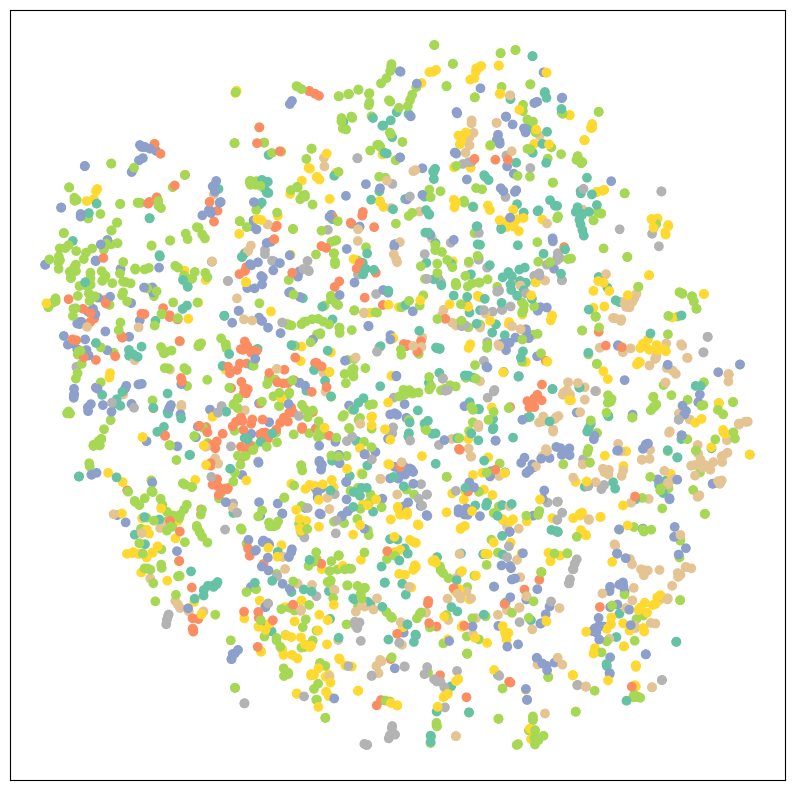

In [24]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [26]:
##训练

model = GCN(hidden_channels = 16)

criterion = torch.nn.CrossEntropyLoss()  #交叉熵
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim = 1)
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    test.acc = (int)(test_correct.sum())/int(data.test_mask.sum())
    return test.acc

for epoch in range(1,201):
    loss = train()
    if epoch % 10 == 0:
        print(loss)

tensor(1.8685, grad_fn=<NllLossBackward0>)
tensor(1.7310, grad_fn=<NllLossBackward0>)
tensor(1.5576, grad_fn=<NllLossBackward0>)
tensor(1.3258, grad_fn=<NllLossBackward0>)
tensor(1.1296, grad_fn=<NllLossBackward0>)
tensor(0.9741, grad_fn=<NllLossBackward0>)
tensor(0.7711, grad_fn=<NllLossBackward0>)
tensor(0.6755, grad_fn=<NllLossBackward0>)
tensor(0.6535, grad_fn=<NllLossBackward0>)
tensor(0.5799, grad_fn=<NllLossBackward0>)
tensor(0.5377, grad_fn=<NllLossBackward0>)
tensor(0.4883, grad_fn=<NllLossBackward0>)
tensor(0.4183, grad_fn=<NllLossBackward0>)
tensor(0.3921, grad_fn=<NllLossBackward0>)
tensor(0.4069, grad_fn=<NllLossBackward0>)
tensor(0.3510, grad_fn=<NllLossBackward0>)
tensor(0.3357, grad_fn=<NllLossBackward0>)
tensor(0.3497, grad_fn=<NllLossBackward0>)
tensor(0.3748, grad_fn=<NllLossBackward0>)
tensor(0.3045, grad_fn=<NllLossBackward0>)


In [27]:
##计算准确率
test_acc = test()
print(test_acc)

0.802


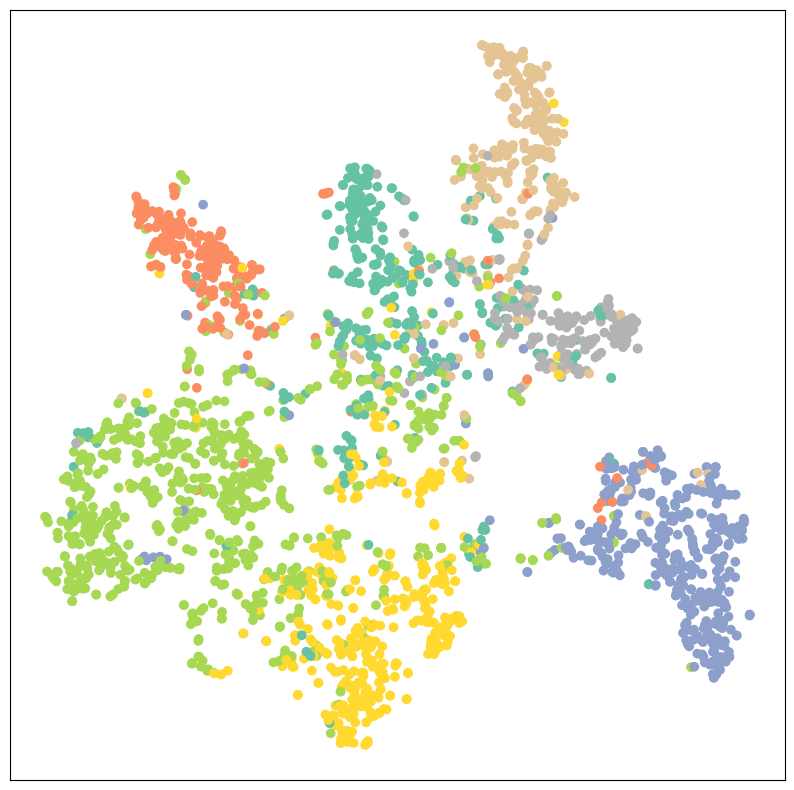

In [28]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)